#### Training Dataset Overview with Missing Values Count:

,Column,Non-Null Count,Missing Values,Data Type
age,age,700,0,int64
ed,ed,700,0,int64
employ,employ,700,0,int64
address,address,700,0,int64
income,income,700,0,int64
debtinc,debtinc,700,0,float64
creddebt,creddebt,700,0,float64
othdebt,othdebt,700,0,float64
default,default,700,0,float64



Insight: The dataset has no missing values in the first 700 rows used for modeling (training and testing). The last 150 rows are set aside for predicting the 'default' column values. Note: Out of the initial 700 rows, only 80% are used for training, and 20% for testing.


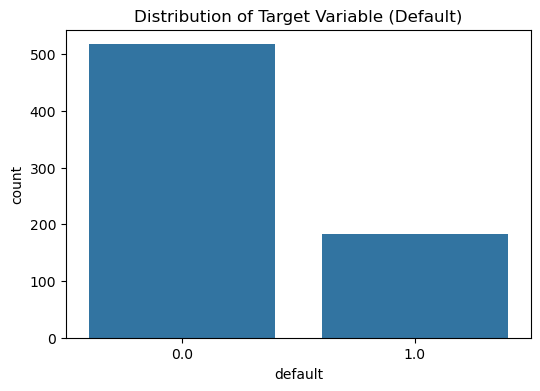


Insight: The target variable is imbalanced with 517 non-defaults and 183 defaults, resulting in an imbalance ratio of ~2.8:1. This imbalance may bias the model towards predicting non-default cases. Rebalancing techniques like class weights or SMOTE are necessary to improve detection of the minority class.


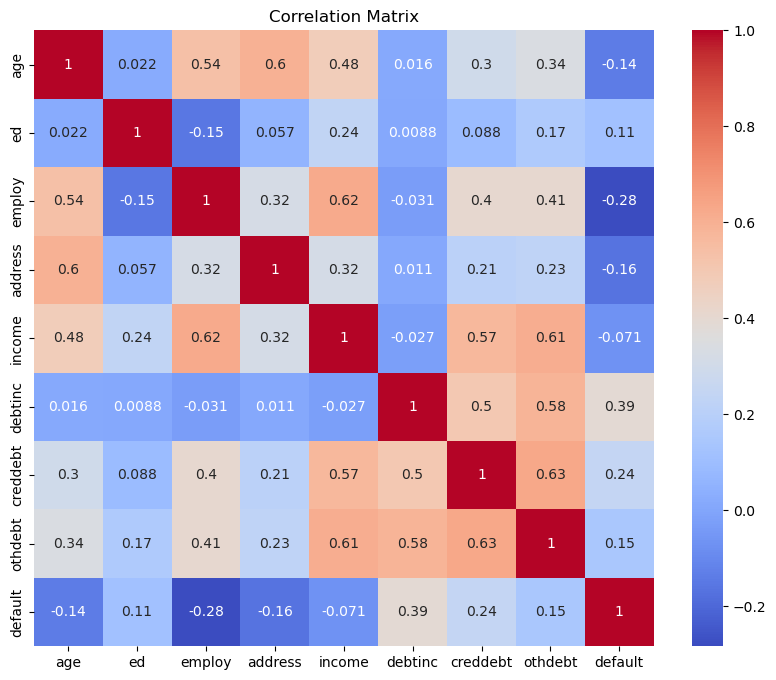


Insight: Features such as 'debtinc' (0.39) and 'creddebt' (0.24) are positively correlated with defaults, indicating that higher debt ratios increase default risk. In contrast, 'employ' (-0.28) shows a negative correlation, implying that longer employment reduces the likelihood of default. Correlations, however, are generally weak, suggesting no single predictor is strongly indicative on its own.


<Figure size 1200x1000 with 0 Axes>

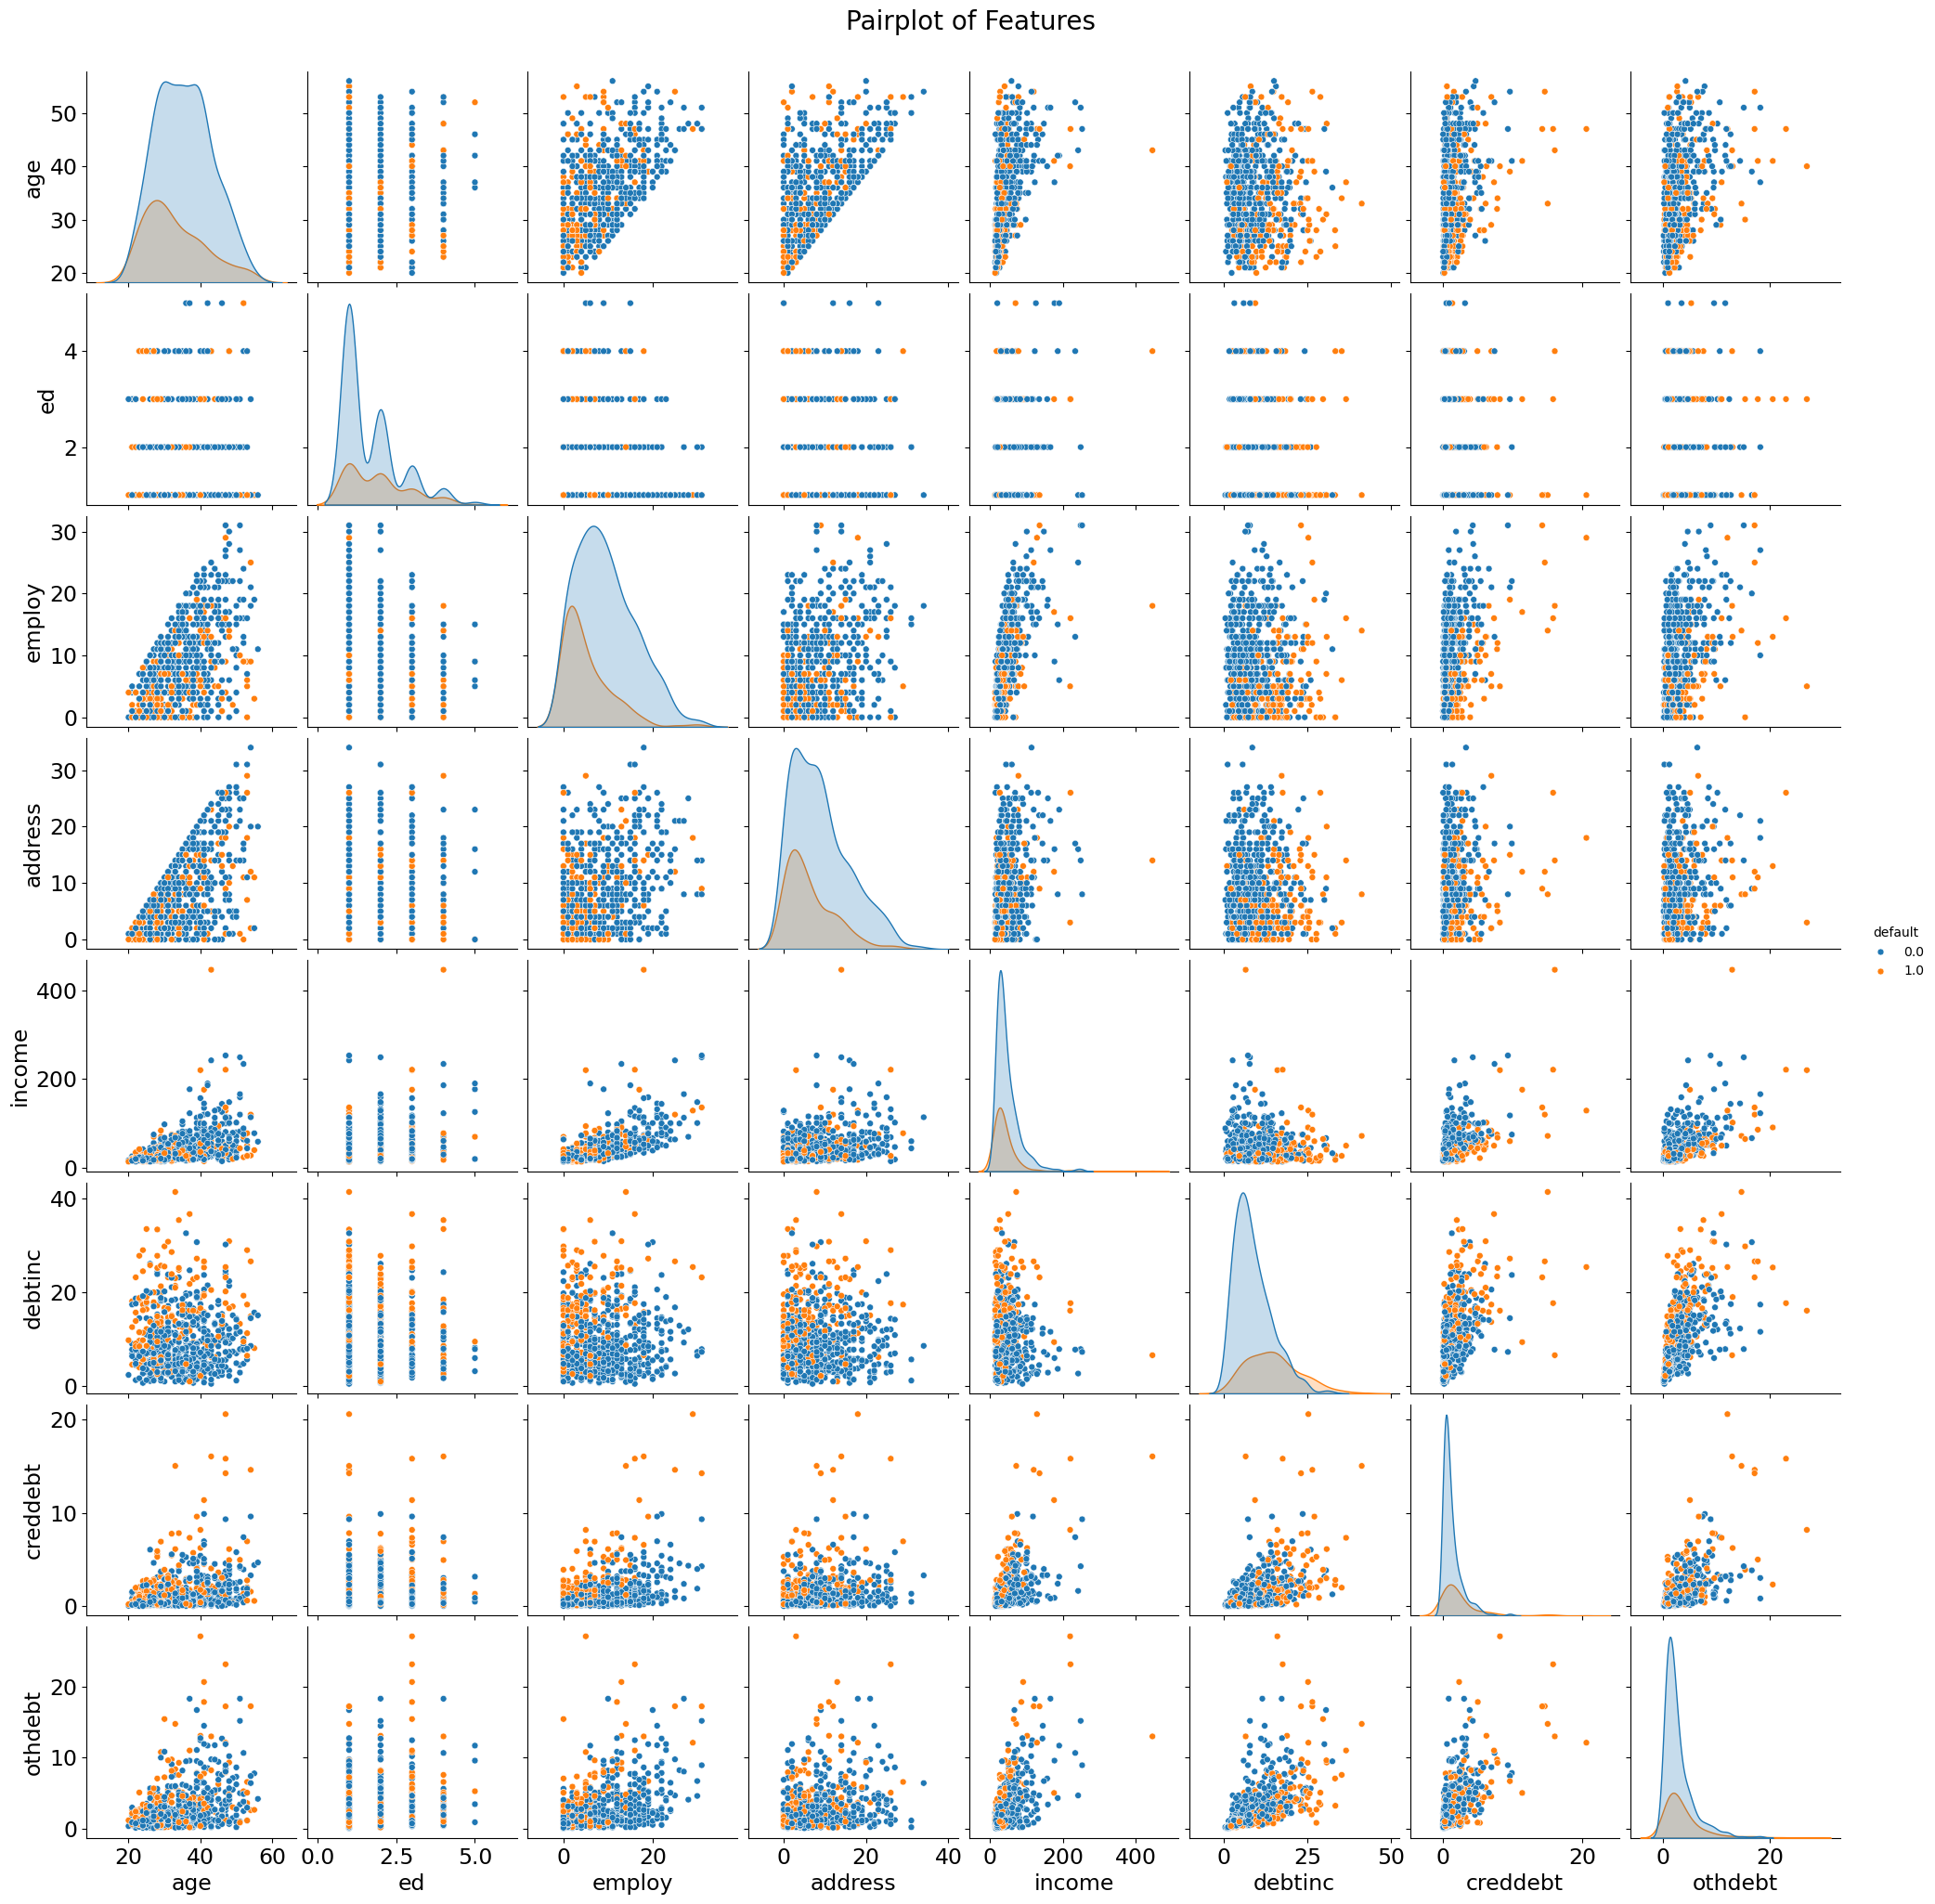


Insight: The pairplot shows clustering patterns, particularly in features like 'income' vs 'debtinc' and 'income' vs 'creddebt'. Clustering indicates that individuals with lower income and higher debt ratios are more likely to default. Clustering analysis helps in understanding how groups of data points with similar characteristics are related to the target variable.

VIF Data:
    Feature       VIF
0       age  2.018512
1        ed  1.262185
2    employ  2.204052
3   address  1.563287
4    income  4.206131
5   debtinc  3.246393
6  creddebt  2.516961
7   othdebt  3.850861


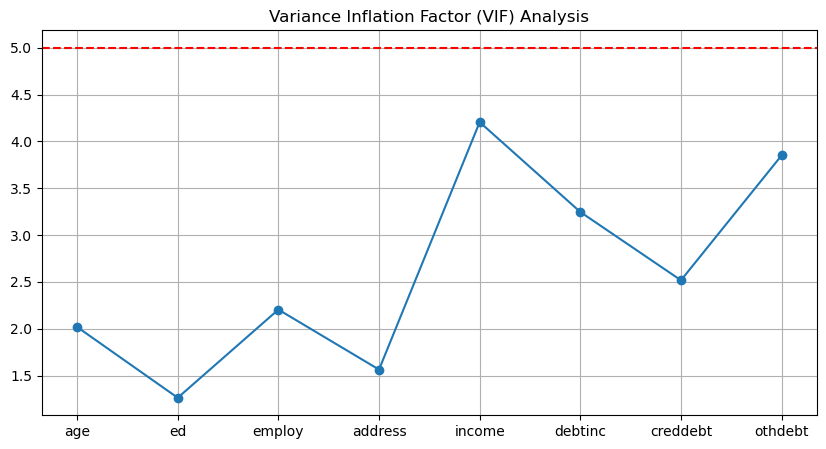


Insight: All VIF values are below 5, indicating no severe multicollinearity among features. Multicollinearity refers to high intercorrelations among independent variables, which can destabilize the model by inflating variances. Low multicollinearity is essential for stable and interpretable models.

Classification Report (Random Forest):
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86       102
         1.0       0.65      0.39      0.49        38

    accuracy                           0.78       140
   macro avg       0.73      0.66      0.68       140
weighted avg       0.76      0.78      0.76       140


Confusion Matrix (Random Forest):
[[94  8]
 [23 15]]

Classification Report (Original xgBoost Model):
              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85       102
         1.0       0.62      0.39      0.48        38

    accuracy                           0.77       140
   macro av


<div style='color: blue;'>
    <b>Insight on Model Differences:</b>
    <p>Out of the box, both Random Forest and XGBoost models performed similarly on our small dataset, showing that XGBoost's epic advantages, like its boosting mechanism, are not fully realized without proper configurations or larger datasets.</p>
    <p>While both models handle imbalanced data, XGBoost, as an epic software tool, excels when techniques like class weighting and SMOTE are applied, significantly improving recall for identifying defaulters.</p>
    <p>In large-scale credit risk scenarios, where handling complex data is crucial, XGBoost would likely outperform Random Forest, making it a better choice for credit risk prediction in sophisticated software systems.</p>
</div>



Classification Report (Class Weight - xgBoost):
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       102
         1.0       0.65      0.53      0.58        38

    accuracy                           0.79       140
   macro avg       0.74      0.71      0.72       140
weighted avg       0.78      0.79      0.79       140


Confusion Matrix (Class Weight - xgBoost):
[[91 11]
 [18 20]]

Classification Report (SMOTE - xgBoost):
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86       102
         1.0       0.62      0.53      0.57        38

    accuracy                           0.79       140
   macro avg       0.73      0.70      0.71       140
weighted avg       0.78      0.79      0.78       140


Confusion Matrix (SMOTE - xgBoost):
[[90 12]
 [18 20]]



<div style='color: blue;'>
    <b>General Insight:</b>
    <ul>
        <li>The original model shows lower recall for defaulters, leading to higher false negatives.</li>
        <li>The Class Weight model improves recall but slightly increases false positives.</li>
        <li>SMOTE further improves recall for defaulters, reducing false negatives while slightly increasing false positives.</li>
        <li>Accuracy remained the same in all 4 models.</li>
        <li>The f1-score remains stable for non-defaulters, but significant gains are seen for defaulters due to better recall.</li>
        <li>The rebalanced models improved detection of defaulters: 5 additional true positives and 6 fewer false negatives, although with 2 extra false positives.</li>
    </ul>
</div>



<div style='color: green;'>
    <b>Potential Areas of Improvement:</b>
    <ul>
        <li>Expanding the dataset to include more observations and features could improve model performance.</li>
        <li>Further hyperparameter tuning using tools like GridSearchCV could optimize results.</li>
        <li>Exploring additional algorithms like Logistic Regression or SVM for better interpretability.</li>
        <li>Applying cross-validation to ensure robust evaluation and avoid overfitting.</li>
        <li>Using dimensionality reduction (e.g., PCA) to simplify features while preserving information.</li>
    </ul>
</div>


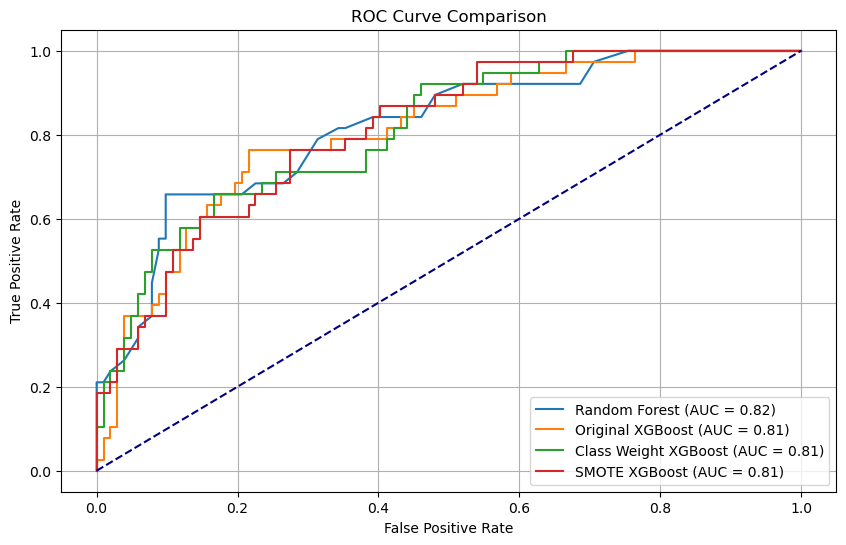


<div style='color: blue;'>
    <b>General Insight on ROC Curve Analysis:</b>
    <p>Interestingly, the ROC curves for all models — Random Forest, Original XGBoost, Class-Weighted XGBoost, and SMOTE XGBoost — show almost identical performance, with AUC scores around 0.81 to 0.82. This indicates that, based on the ROC curve alone, the rebalancing techniques (Class Weight and SMOTE) do not provide noticeable improvements in overall model discrimination.</p>
    <ul>
        <li><b>Implication:</b> The rebalanced models, while theoretically designed to improve recall for the minority class, do not demonstrate a clear advantage in the ROC curve. This raises the question: are these techniques truly enhancing the model's performance, or are we using an evaluation metric (AUC) that doesn't fully capture the benefits of rebalancing?</li>
        <li><b>Alternative Considerations:</b> While the ROC curve is a useful tool, it might not be sufficient on its own to assess the impact of rebalancing. Metrics like precision, recall, and f1-score, especially for the minority class (defaulters), may provide deeper insights into whether the models are genuinely improving in terms of real-world predictive value.</li>
        <li>Overall, while the ROC curve analysis suggests no significant improvement, the rebalanced XGBoost models are still valuable, particularly in scenarios where identifying defaulters is crucial, even if this doesn't translate into a higher AUC.</li>
    </ul>
</div>


In [70]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, Markdown

# Load the dataset from the provided URL
url = 'https://github.com/Safa1615/Dataset--loan/blob/main/bank-loan.csv?raw=true'
data = pd.read_csv(url)

# Step 1: Separate the first 700 rows for training and testing, and the last 150 rows for prediction
train_data = data.iloc[:700]
predict_data = data.iloc[700:]

# Display dataset overview with missing values count
title = "#### Training Dataset Overview with Missing Values Count:"
display(Markdown(title))  # This will render a bold and larger title
overview = pd.DataFrame({
    'Column': train_data.columns,
    'Non-Null Count': train_data.notnull().sum(),
    'Missing Values': train_data.isnull().sum(),
    'Data Type': train_data.dtypes
})
display(overview)
print("\nInsight: The dataset has no missing values in the first 700 rows used for modeling (training and testing). The last 150 rows are set aside for predicting the 'default' column values. Note: Out of the initial 700 rows, only 80% are used for training, and 20% for testing.")

# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='default', data=train_data)
plt.title('Distribution of Target Variable (Default)')
plt.show()
print("\nInsight: The target variable is imbalanced with 517 non-defaults and 183 defaults, resulting in an imbalance ratio of ~2.8:1. This imbalance may bias the model towards predicting non-default cases. Rebalancing techniques like class weights or SMOTE are necessary to improve detection of the minority class.")

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
print("\nInsight: Features such as 'debtinc' (0.39) and 'creddebt' (0.24) are positively correlated with defaults, indicating that higher debt ratios increase default risk. In contrast, 'employ' (-0.28) shows a negative correlation, implying that longer employment reduces the likelihood of default. Correlations, however, are generally weak, suggesting no single predictor is strongly indicative on its own.")

# Pairplot for feature relationships with improved readability
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(
    train_data, 
    hue='default', 
    height=2.5, 
    plot_kws={'s': 25}  # Increase marker size for better visibility
)
# Set a larger title
pairplot.fig.suptitle('Pairplot of Features', y=1.02, fontsize=20)

# Adjust font sizes for axes and labels
for ax in pairplot.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=17)
    ax.set_ylabel(ax.get_ylabel(), fontsize=17)
    ax.tick_params(axis='both', which='major', labelsize=17)

plt.show()

print("\nInsight: The pairplot shows clustering patterns, particularly in features like 'income' vs 'debtinc' and 'income' vs 'creddebt'. Clustering indicates that individuals with lower income and higher debt ratios are more likely to default. Clustering analysis helps in understanding how groups of data points with similar characteristics are related to the target variable.")

# Handle missing values by dropping rows with missing values
train_data = train_data.dropna()

# Variance Inflation Factor (VIF) Analysis
X_vif = train_data.drop('default', axis=1)
X_scaled_vif = StandardScaler().fit_transform(X_vif)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_vif, i) for i in range(X_scaled_vif.shape[1])]
print("\nVIF Data:")
print(vif_data)

plt.figure(figsize=(10, 5))
plt.plot(vif_data['Feature'], vif_data['VIF'], marker='o')
plt.axhline(y=5, color='r', linestyle='--')
plt.title('Variance Inflation Factor (VIF) Analysis')
plt.grid(True)
plt.show()
print("\nInsight: All VIF values are below 5, indicating no severe multicollinearity among features. Multicollinearity refers to high intercorrelations among independent variables, which can destabilize the model by inflating variances. Low multicollinearity is essential for stable and interpretable models.")

# Split the dataset into features (X) and target (y)
X = train_data.drop('default', axis=1)
y = train_data['default']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#I applied feature scaling using StandardScaler to standardize the independent variables. This was done to ensure that all features have a mean of 0 and a standard deviation of 1. 
#In this case, adding or removing the scaling step doesn't change the results significantly because XGBoost is inherently unaffected by feature scales.
#Scaling is particularly important in models that are sensitive to the scale of the input features, such as distance-based algorithms and models using gradient-based optimization.

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define function to display classification report and confusion matrix
def display_performance(model_name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    print(f"\nClassification Report ({model_name}):")
    print(classification_report(y_test, y_pred))
    
    confusion = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix ({model_name}):\n{confusion}")
    
    return y_pred, y_pred_proba, confusion

### Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf, y_pred_proba_rf, confusion_rf = display_performance("Random Forest", rf_model, X_test, y_test)

### Original XGBoost Model
xgb_original = xgb.XGBClassifier(n_estimators=100, random_state=42, learning_rate=0.3, max_depth=6)
xgb_original.fit(X_train, y_train)
y_pred_orig, y_pred_proba_orig, confusion_orig = display_performance("Original xgBoost Model", xgb_original, X_test, y_test)
model_difference_insight = """
<div style='color: blue;'>
    <b>Insight on Model Differences:</b>
    <p>Out of the box, both Random Forest and XGBoost models performed similarly on our small dataset, showing that XGBoost's epic advantages, like its boosting mechanism, are not fully realized without proper configurations or larger datasets.</p>
    <p>While both models handle imbalanced data, XGBoost, as an epic software tool, excels when techniques like class weighting and SMOTE are applied, significantly improving recall for identifying defaulters.</p>
    <p>In large-scale credit risk scenarios, where handling complex data is crucial, XGBoost would likely outperform Random Forest, making it a better choice for credit risk prediction in sophisticated software systems.</p>
</div>
"""
display(Markdown(model_difference_insight))

### Class Weight Approach
class_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
xgb_weighted = xgb.XGBClassifier(scale_pos_weight=class_ratio, n_estimators=100, random_state=42, learning_rate=0.3, max_depth=6)
xgb_weighted.fit(X_train, y_train)
y_pred_weighted, y_pred_proba_weighted, confusion_weighted = display_performance("Class Weight - xgBoost", xgb_weighted, X_test, y_test)

### SMOTE Approach
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
xgb_smote = xgb.XGBClassifier(n_estimators=100, random_state=42, learning_rate=0.3, max_depth=6)
xgb_smote.fit(X_train_smote, y_train_smote)
y_pred_smote, y_pred_proba_smote, confusion_smote = display_performance("SMOTE - xgBoost", xgb_smote, X_test, y_test)

# General Insight after classification and confusion matrices
general_insight = """
<div style='color: blue;'>
    <b>General Insight:</b>
    <ul>
        <li>The original model shows lower recall for defaulters, leading to higher false negatives.</li>
        <li>The Class Weight model improves recall but slightly increases false positives.</li>
        <li>SMOTE further improves recall for defaulters, reducing false negatives while slightly increasing false positives.</li>
        <li>Accuracy remained the same in all 4 models.</li>
        <li>The f1-score remains stable for non-defaulters, but significant gains are seen for defaulters due to better recall.</li>
        <li>The rebalanced models improved detection of defaulters: 5 additional true positives and 6 fewer false negatives, although with 2 extra false positives.</li>
    </ul>
</div>
"""
display(Markdown(general_insight))

# Potential Areas of Improvement
areas_of_improvement = """
<div style='color: green;'>
    <b>Potential Areas of Improvement:</b>
    <ul>
        <li>Expanding the dataset to include more observations and features could improve model performance.</li>
        <li>Further hyperparameter tuning using tools like GridSearchCV could optimize results.</li>
        <li>Exploring additional algorithms like Logistic Regression or SVM for better interpretability.</li>
        <li>Applying cross-validation to ensure robust evaluation and avoid overfitting.</li>
        <li>Using dimensionality reduction (e.g., PCA) to simplify features while preserving information.</li>
    </ul>
</div>
"""
display(Markdown(areas_of_improvement))

# ROC Curve Comparison
models = {
    'Random Forest': (y_pred_rf, y_pred_proba_rf),
    'Original XGBoost': (y_pred_orig, y_pred_proba_orig),
    'Class Weight XGBoost': (y_pred_weighted, y_pred_proba_weighted),
    'SMOTE XGBoost': (y_pred_smote, y_pred_proba_smote)
}

plt.figure(figsize=(10, 6))
for model_name, (y_pred, y_pred_proba) in models.items():
    # Calculate False Positive Rate (fpr) and True Positive Rate (tpr)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
roc_insight_refined = """
<div style='color: blue;'>
    <b>General Insight on ROC Curve Analysis:</b>
    <p>Interestingly, the ROC curves for all models — Random Forest, Original XGBoost, Class-Weighted XGBoost, and SMOTE XGBoost — show almost identical performance, with AUC scores around 0.81 to 0.82. This indicates that, based on the ROC curve alone, the rebalancing techniques (Class Weight and SMOTE) do not provide noticeable improvements in overall model discrimination.</p>
    <ul>
        <li><b>Implication:</b> The rebalanced models, while theoretically designed to improve recall for the minority class, do not demonstrate a clear advantage in the ROC curve. This raises the question: are these techniques truly enhancing the model's performance, or are we using an evaluation metric (AUC) that doesn't fully capture the benefits of rebalancing?</li>
        <li><b>Alternative Considerations:</b> While the ROC curve is a useful tool, it might not be sufficient on its own to assess the impact of rebalancing. Metrics like precision, recall, and f1-score, especially for the minority class (defaulters), may provide deeper insights into whether the models are genuinely improving in terms of real-world predictive value.</li>
        <li>Overall, while the ROC curve analysis suggests no significant improvement, the rebalanced XGBoost models are still valuable, particularly in scenarios where identifying defaulters is crucial, even if this doesn't translate into a higher AUC.</li>
    </ul>
</div>
"""
display(Markdown(roc_insight_refined))